<a href="https://colab.research.google.com/github/parthagarwal04/Fake-News-Predictitor/blob/main/Fake_News_predictor_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline



Reading the data and storing it in a variable

In [5]:
data = pd.read_csv('/content/train.csv.zip')

In [ ]:
#for analysing the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


Data Cleaning

In [6]:
#Deleting unnecessary fields
data = data.drop(columns=['id'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [7]:
#Deleting unnecessary fields
data = data.drop(columns=['title','author'], axis=1)

In [11]:
data = data.dropna(axis=0)

In [ ]:
len(data)

20761

In [8]:
#checking if data is there neatly
data.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


Deleting all the stopwords (all words like 'is', 'an' 'the' which have no impact on our model

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = cleaned_text.split()
    filtered_words = [word for word in words if word not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

data['text'] = data['text'].apply(remove_stopwords)

In [14]:
data.head(10)

,text,label
0,house dem aide even see comey letter jason cha...,1
1,ever get feeling life circles roundabout rathe...,0
2,truth might get fired october tension intellig...,1
3,videos civilians killed single us airstrike id...,1
4,print iranian woman sentenced six years prison...,1
5,trying times jackie mason voice reason week ex...,0
6,ever wonder britain iconic pop pianist gets lo...,1
7,paris france chose idealistic traditional cand...,0
8,donald j trump scheduled make highly anticipat...,0
9,week michael flynn resigned national security ...,0


Visualizing Data Using Diffrent Plots

label
0    10387
1    10374
Name: text, dtype: int64


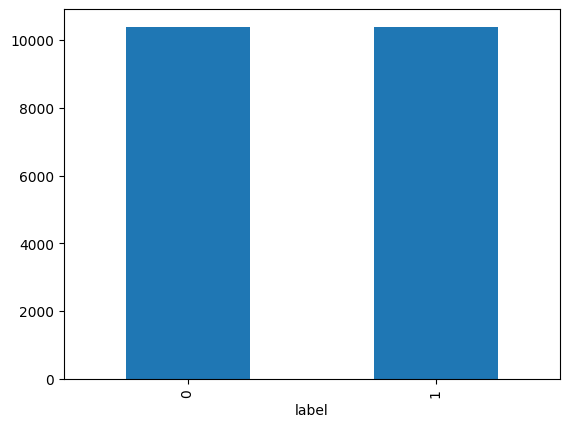

In [ ]:
print(data.groupby(['label'])['text'].count())
data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [15]:
pip install wordcloud matplotlib

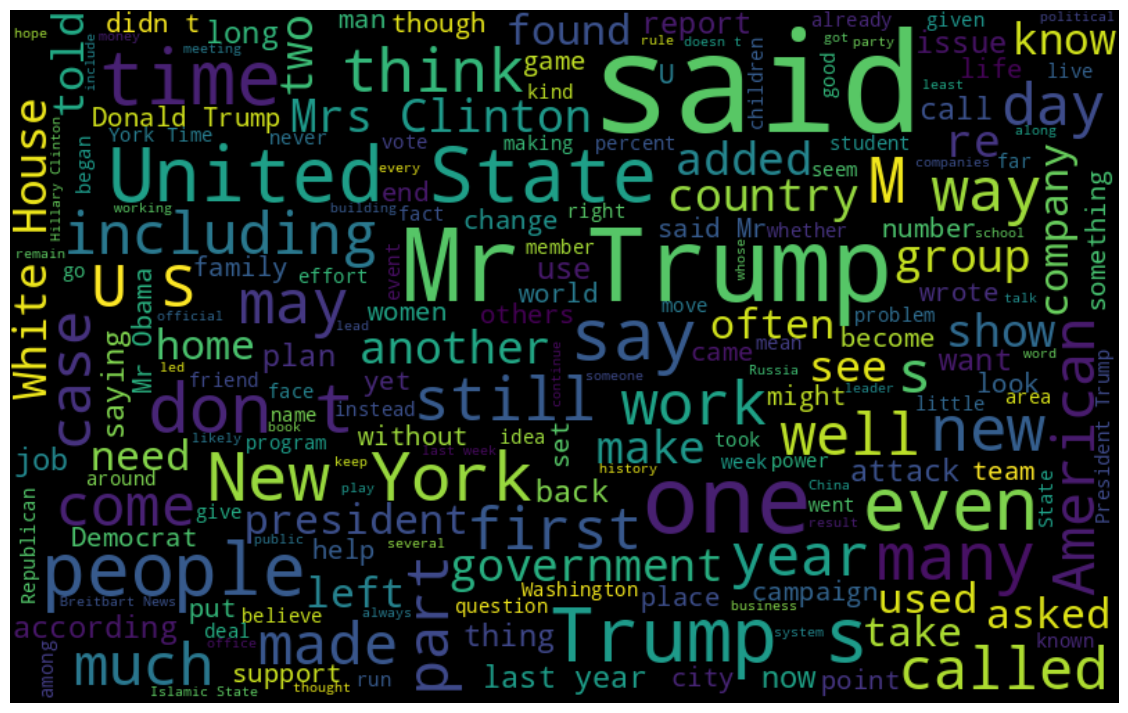

In [ ]:
# visualize the frequent words for real news
all_words = " ".join([sentence for sentence in data['text'][data['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

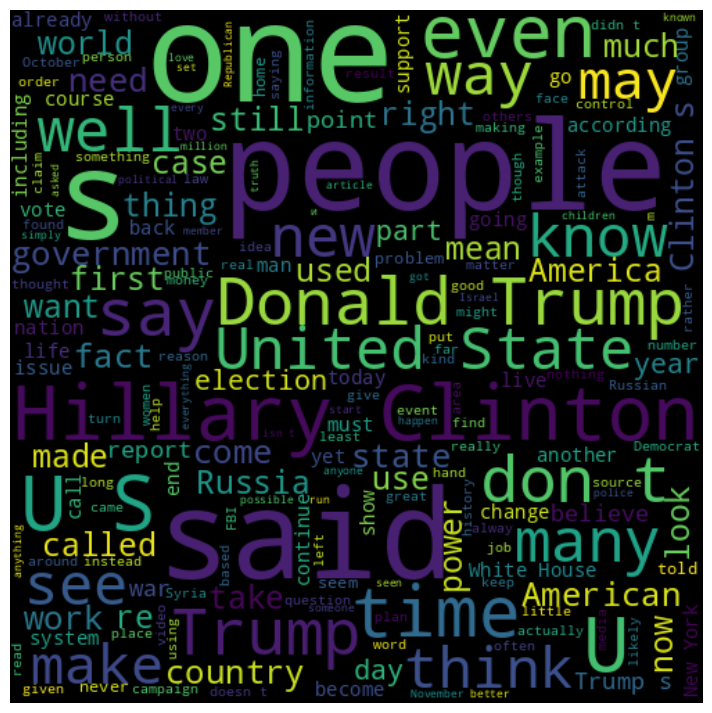

In [ ]:
# visualize the frequent words for fake news
all_words = " ".join([sentence for sentence in data['text'][data['label']==1]])

wordcloud = WordCloud(width=500, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
#Making counter function
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(data, column_text, quantity):
    all_words = ' '.join(data[column_text])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(quantity, columns="Frequency")

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", color='blue')
    ax.set(ylabel="Count")
    plt.xticks(rotation='vertical')
    plt.show()

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x7b9eeb0e15a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nltk/data.py", line 1160, in __del__
  File "/usr/local/lib/python3.10/dist-packages/nltk/data.py", line 1180, in closed
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'


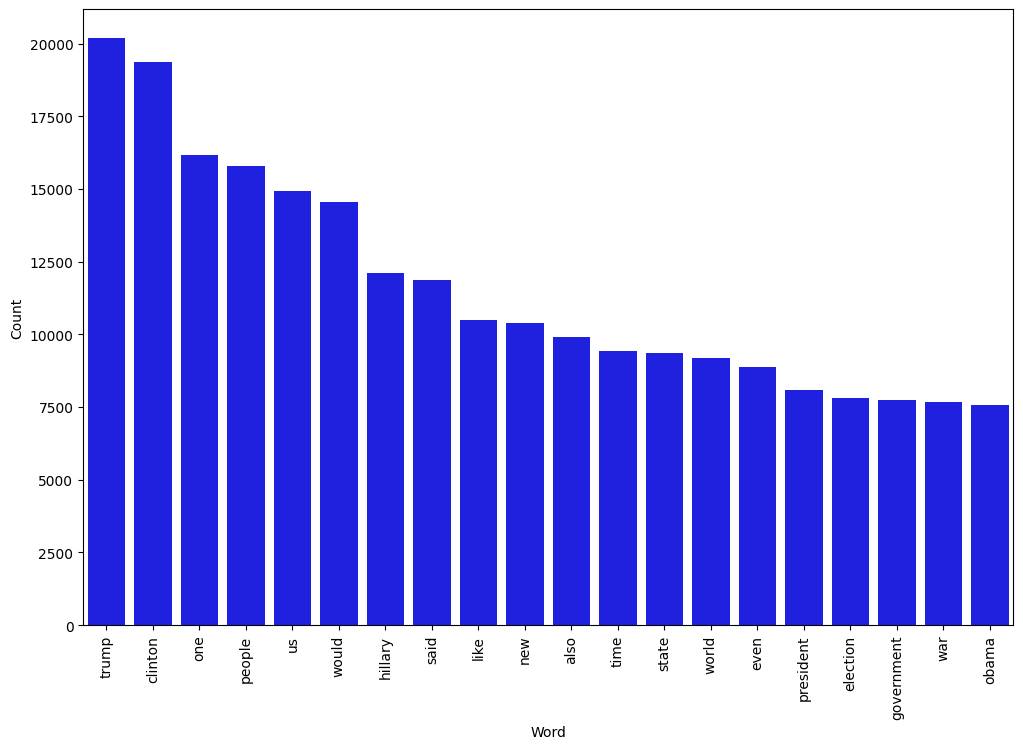

In [ ]:
#Word counts in fake news
counter(data[data["label"] == 1], "text", 20)


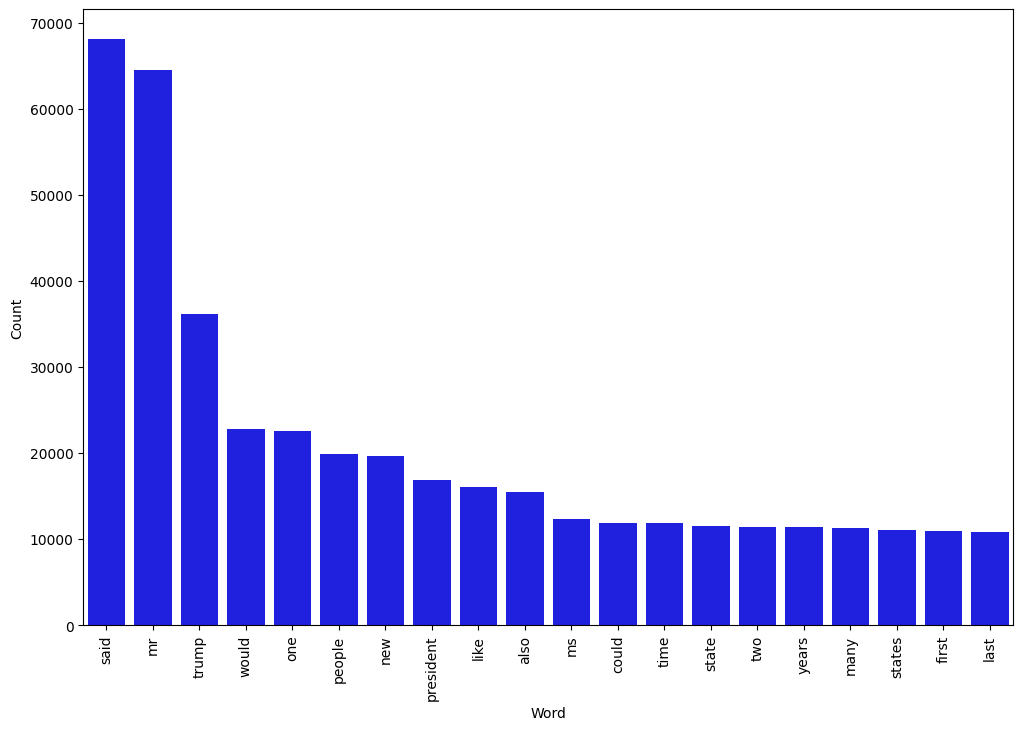

In [17]:
#Word counts in Real news
counter(data[data["label"] == 0], "text", 20)

function to plot the confusion matrix

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Splitting the data into into Testing and Training Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.3, random_state=23)

In [ ]:
X_train.head(10)

9105     police arrested prominent democratic leader st...
19620    washington senator tim kaine office much left ...
1800     anorexia sexual la plaga del siglo xxi por qu ...
4973     november michelle obama warns playing around p...
3047     posted november dr eowyn comment bob woodward ...
14094    easy imagine obama kerry pissing heard specifi...
1664     paris police raided dozens sites across belgiu...
17992    arlington va rise donald j trump hostility tow...
13288    amaal elhaaj fighting radical islamic terroris...
18429    nato forces russia take retaliatory moves russ...
Name: text, dtype: object

In [ ]:
y_train.head(10)

9105     0
19620    0
1800     1
4973     1
3047     1
14094    1
1664     0
17992    0
13288    0
18429    1
Name: label, dtype: int64

Training the model and checking accuracy on the Testing data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 30,
                                           splitter='best',
                                           random_state=23))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 87.65%


Printing the confusion Matrix

Confusion matrix, without normalization


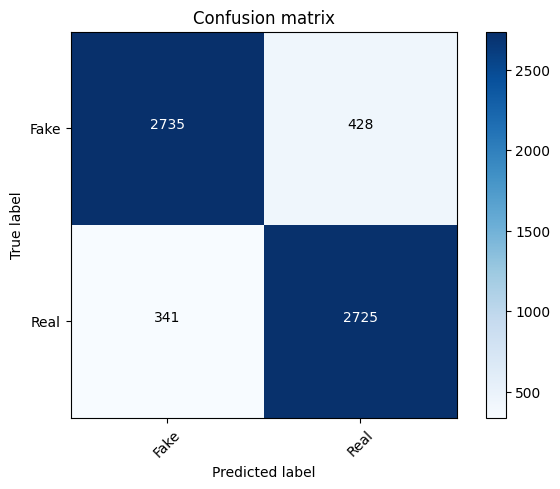

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])